# Data preparation

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
# Import data
file_path = "glass_data.csv"
headers = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
elements = ['Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
glass_df = pd.read_csv(file_path, sep=',', decimal='.', header=None, names=headers, index_col=0)

In [3]:
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Examnine data shape, entry errors and missing values

In [4]:
# Shape of data
glass_df.shape

(214, 10)

In [5]:
glass_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


The description indicates that:
- The attributes are all numeric types. There are no data type entry errors.
- The number of instances is 214, which matches the number of attributes in each column. We deduce that there is no missing values in the dataset.


## Examine impossible values and outliers

We further detects impossible values and outliers in the dataset using boxplot. Here, the outliers are identified via IQR method. That means, a value is considered in outlier if it is outside the range of Q3-Q1 interquatile range. (ref)

Text(0.5, 0.98, 'Chemical element distribution in glass')

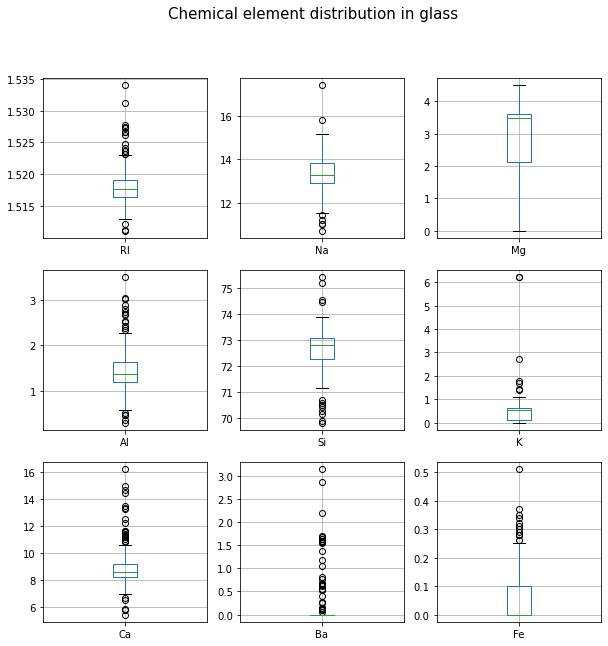

In [20]:
fig, axes = plt.subplots(3,3, figsize=(10,10))

for i in range(len(headers)-1):
    a = glass_df.boxplot(column=headers[i], ax = axes.flatten()[i], figsize=(12,8))
fig.suptitle('Chemical element distribution in glass', fontsize=15)

From the boxplot, it can be observed that:
- Most of the figures have outliers, except for Magnesium.
- Boxplot figure is not applied well for Barium, so we cannot decide whether it has outliers or not. 
- Apart from Na and K, other elements have an excessive number of outliers.

However, we do not have enough evidence to consider the out of range values as outliers, since it could be a proportion indicating new source of glass. Thus, these outliers should be kept in the dataset.

For the elemental composition, the impossible values can be evaluated via two criteria:
- The weight percentage of the oxides should be >= 0 and < 100. 
- The sum of the weight percentages of the corresponding oxides in a glass composition should not be > 100%. It can be less than 100%, because there might be impurities in the composition. https://www.geeksforgeeks.org/percent-by-weight-formula/

For the refractive index, general glass fractive index cannot be negative.  https://www.asdlib.org/onlineArticles/elabware/thompson/Glass/Glass(RI)PFaculty.pdf

If a fragment (a row) does not satisfy these criteria, it should be eliminated from the dataset.

In [26]:
# Examine weight percentage of each element if it is out of range (0,100)
out_of_range = ((glass_df[elements] < 0) | (glass_df[elements] >= 100)).any()
out_of_range

Na    False
Mg    False
Al    False
Si    False
K     False
Ca    False
Ba    False
Fe    False
dtype: bool

In [7]:
# Examine the sum of weight percentage
weight_percentage_sum = glass_df[elements].sum(axis=1)
larger_than_100 = weight_percentage_sum.loc[weight_percentage_sum > 100.00001]
larger_than_100.name='Sum'
larger_than_100_df = glass_df[elements].loc[larger_than_100.index.tolist()]
larger_than_100_df.join(larger_than_100)

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Sum
10,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11,100.03
20,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,100.03
31,12.65,3.56,1.30,73.08,0.61,8.69,0.00,0.14,100.03
33,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22,100.01
34,12.57,3.47,1.38,73.39,0.60,8.55,0.00,0.06,100.02
47,13.19,3.37,1.18,72.72,0.57,8.83,0.00,0.16,100.02
51,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,100.01
52,13.20,3.33,1.28,72.36,0.60,9.14,0.00,0.11,100.02
56,12.45,2.71,1.29,73.70,0.56,9.06,0.00,0.24,100.01
68,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,100.10


In [23]:
larger_than_100.count()

26

Observing the weight percentage summation, there are 26 rows having the summation larger than 100, with minor deviations from 0.01 to 0.1. These small variations can be explained by measurement and rounding errors. Hence, the values are acceptable, with the belief that it would introduce little error in the modelling stage.

In [29]:
# Examine the refractive index
(glass_df['RI'] < 0).any() 

False

There is no negative value of RI. However, it can be seen that the unit measurement of RI is different from other elements. Therefore, the d

# Data exploration

## Univariate analysis

In [30]:
glass_df[glass_df.columns.difference(['Type'])].describe()

,Al,Ba,Ca,Fe,K,Mg,Na,RI,Si
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.444907,0.175047,8.956963,0.057009,0.497056,2.684533,13.407850,1.518365,72.650935
std,0.499270,0.497219,1.423153,0.097439,0.652192,1.442408,0.816604,0.003037,0.774546
min,0.290000,0.000000,5.430000,0.000000,0.000000,0.000000,10.730000,1.511150,69.810000
25%,1.190000,0.000000,8.240000,0.000000,0.122500,2.115000,12.907500,1.516522,72.280000
50%,1.360000,0.000000,8.600000,0.000000,0.555000,3.480000,13.300000,1.517680,72.790000
75%,1.630000,0.000000,9.172500,0.100000,0.610000,3.600000,13.825000,1.519157,73.087500
max,3.500000,3.150000,16.190000,0.510000,6.210000,4.490000,17.380000,1.533930,75.410000


Text(0.5, 0.98, 'Chemical element distribution in glass')

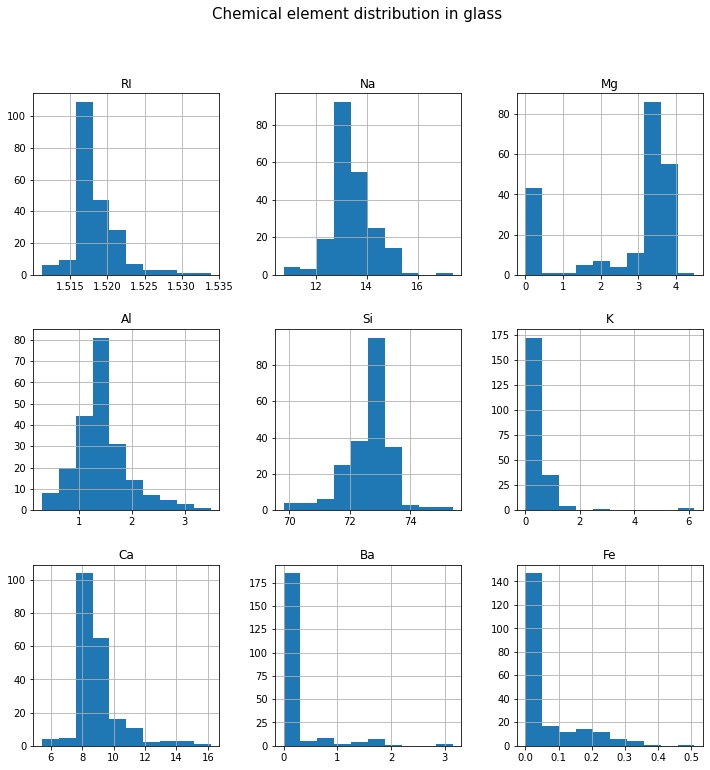

In [11]:
fig, axes = plt.subplots(3,3, figsize=(12,12))

for i in range(len(headers)-1):
    a = glass_df.hist(column=headers[i], ax = axes.flatten()[i], figsize=(12,8))
fig.suptitle('Chemical element distribution in glass', fontsize=15)